In [ ]:
# importing required libraries

import os
import math
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# creating new directory to store images

os.mkdir('images')

In [ ]:
# uploading all images

files.upload()

Saving img.rar to img.rar


{'img.rar': b'Rar!\x1a\x07\x00\xcf\x90s\x00\x00\r\x00\x00\x00\x00\x00\x00\x00\xe4\x9dt \x90<\x00<!\x01\x00<!\x01\x00\x02\xa8\xab.\xf1hG\xcfT\x1d0\x17\x00 \x00\x00\x00img\\orangeside-seg1.png\x00\xf0P\x9d~\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xfe\x00\x00\x00\xe7\x08\x06\x00\x00\x00>O\xeb\x02\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x008tEXtSoftware\x00matplotlib version3.2.2, http://matplotlib.org/\x96\x1f\x8c\x89\x00\x00 \x00IDATx\x9c\xec\xbd\xeb\x8e$;\x92\xe7\xf73#\xe9\x1e\x11\x99UuN\xf7\xcc\xee@\xab\x85 `\x01\xbd\x8b\x1eG\x80\x1eE\x80\x9eG/"\xad.X\xed\xce\xf6t\xd7%3\xc2\xddI3}0\xd2\xc33*\xabN\x8fz!}\x98\xc3B\xa023"\xfcB\xa7\xdd\xfe\xf67\xa3\xb8;\xbf\x8f\xdf\xc7\xef\xe3_\xd6\xd0\xff\xbf/\xe0\xf7\xf1\xfb\xf8}\xfc\x7f?~\x17\xfc\xdf\xc7\xef\xe3_\xe0\xf8]\xf0\x7f\x1f\xbf\x8f\x7f\x81\xe3w\xc1\xff}\xfc>\xfe\x05\x8e\xdf\x05\xff\xf7\xf1\xfb\xf8\x178\xf2\xcf\xde\xfc\x9f\xfe\x87\xff\xdeK)\xb8;\xeb\xbaRk\xc

In [ ]:
# extracting all images from rar file

!unrar e img.rar '/content/images'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from img.rar

Extracting  /content/images/orangeside-seg1.png                            7%  OK 
Extracting  /content/images/orangeside-seg2.png                            8%  OK 
Extracting  /content/images/orangeside.png                                17%  OK 
Extracting  /content/images/orangetop-seg1.png                            23%  OK 
Extracting  /content/images/orangetop-seg2.png                            24%  OK 
Extracting  /content/images/orangetop.png                                 33%  OK 
Extracting  /content/images/sachimaside-seg1.png                          43%  OK 
Extracting  /content/images/sachimaside-seg2.png                          48%  OK 
Extracting  /content/images/sachimaside.png                               58%  OK 
Extracting  /content/images/sachimatop-seg1.png                           

In [ ]:
# reading all images and extracting image ids

data = {}
id = []
for files in os.listdir('images'):
  if '.JPG' in files:
    id.append(files.replace('.JPG', ''))
  else:
    data[files] = im.open('/content/images/'+files)

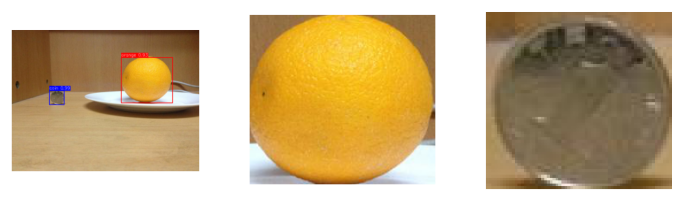

In [ ]:
# plotting original and segmented images of orange in side view

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_axis_off()
ax1.imshow(data['orangeside.png'])
ax2.set_axis_off()
ax2.imshow(data['orangeside-seg1.png'])
ax3.set_axis_off()
ax3.imshow(data['orangeside-seg2.png'])
plt.show()

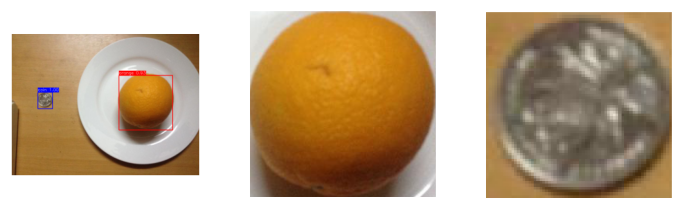

In [ ]:
# plotting original and segmented images of orange in top view

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_axis_off()
ax1.imshow(data['orangetop.png'])
ax2.set_axis_off()
ax2.imshow(data['orangetop-seg1.png'])
ax3.set_axis_off()
ax3.imshow(data['orangetop-seg2.png'])
plt.show()

In [ ]:
# function to estimate volume

def volestim(sideseg1, sideseg2, topseg1, topseg2, data, shape):
  beta = 1.0
  sum = 0
  Ws = data[sideseg2].width
  Hs = data[sideseg2].height
  Wt = data[topseg2].width
  Ht = data[topseg2].height
  tempS = (Ws+Hs)/2
  alphaS = 2.5/tempS
  tempT = (Wt+Ht)/2
  alphaT = 2.5/tempT
  if shape == "ellipsoid":
    Lks = 0
    rows = data[sideseg1].height
    cols = data[sideseg1].width
    for i in range(rows):
      Lks += math.pow(sum, 2)
      sum = 0
      for j in range(cols):
        sum+=1
    volE = beta * (math.pi/4) * Lks * math.pow(alphaS, 3)
    return volE
  if shape == "column":
    St = 0
    rows = data[topseg1].height
    cols = data[topseg1].width
    for i in range(rows):
      St += sum
      sum = 0
      for j in range(cols):
        sum+=1
    volE = beta * St * math.pow(alphaT, 2) * data[sideseg1].height * alphaS
    return volE

In [ ]:
# calculating volume estimation of orange

vol = volestim('orangeside-seg1.png', 'orangeside-seg2.png', 
               'orangetop-seg1.png', 'orangetop-seg2.png', data, 'ellipsoid')
print("Volume Estimation =", vol, "cubic centimeters")

Volume Estimation = 13.766126035742086 cubic centimeters


In [ ]:
# downloading calorie density information file

!wget https://raw.githubusercontent.com/Liang-yc/CalorieEstimation/master/faster_rcnn-master/food_info.xls

--2022-06-16 14:27:32--  https://raw.githubusercontent.com/Liang-yc/CalorieEstimation/master/faster_rcnn-master/food_info.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10073 (9.8K) [application/octet-stream]
Saving to: ‘food_info.xls’

food_info.xls       100%[===================>]   9.84K  --.-KB/s    in 0s      

2022-06-16 14:27:32 (30.8 MB/s) - ‘food_info.xls’ saved [10073/10073]



In [ ]:
# reading downloaded excel file

food = pd.read_excel('food_info.xls')
food

,food_name,shape,calorie/volume(kC/cm^3)
0,apple,ellipsoid,0.407108
1,banana,unknown,0.812816
2,bread,column,0.579659
3,bun,unknown,0.761703
4,coin,NaN,NaN
5,doughnut,torus,1.335867
6,egg,ellipsoid,1.471947
7,fried dough twist,unknown,14.100044
8,grape,unknown,0.667500
9,lemon,ellipsoid,0.278177


In [ ]:
# extracting calorie density value of orange 

cal = float(food['calorie/volume(kC/cm^3)'][food['food_name']=='orange'])

In [ ]:
# calculating total estimated calories of orange

calorie = cal*vol
print("Estimated Calories =", calorie, "kC")

Estimated Calories = 7.833020078910877 kC


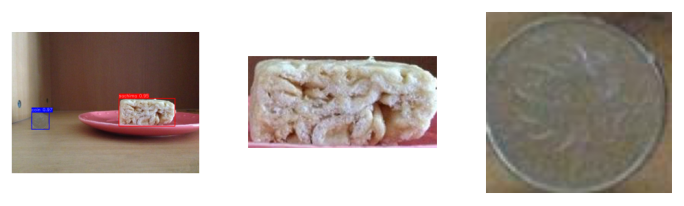

In [ ]:
# plotting original and segmented images of sachima in side view

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_axis_off()
ax1.imshow(data['sachimaside.png'])
ax2.set_axis_off()
ax2.imshow(data['sachimaside-seg1.png'])
ax3.set_axis_off()
ax3.imshow(data['sachimaside-seg2.png'])
plt.show()

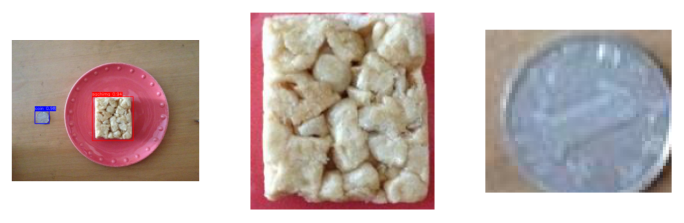

In [ ]:
# plotting original and segmented images of sachima in top view

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_axis_off()
ax1.imshow(data['sachimatop.png'])
ax2.set_axis_off()
ax2.imshow(data['sachimatop-seg1.png'])
ax3.set_axis_off()
ax3.imshow(data['sachimatop-seg2.png'])
plt.show()

In [ ]:
# calculating volume estimation of sachima

vol = volestim('sachimaside-seg1.png', 'sachimaside-seg2.png', 
               'sachimatop-seg1.png', 'sachimatop-seg2.png', data, 'column')
print("Volume Estimation =", vol, "cubic centimeters")

Volume Estimation = 9.619461471313326 cubic centimeters


In [ ]:
# extracting calorie density value of sachima

cal = float(food['calorie/volume(kC/cm^3)'][food['food_name']=='sachima'])

In [ ]:
# calculating total estimated calories of sachima

calorie = cal*vol
print("Estimated Calories =", calorie, "kC")

Estimated Calories = 44.959844054580905 kC
